## Example: Layered Encoding Circuit

This example shows the features of the class ``LayeredEncodingCircuit`` that can be used for a easy
custom creation of new encoding circuits.
Gates in the ``LayeredEncodingCircuit`` are automatically applied to each qubit.

In [1]:
import numpy as np
from squlearn.encoding_circuit.layered_encoding_circuit import LayeredEncodingCircuit, Layer

### Build a layered encoding circuit from a string

The following example shows how an encoding circuit with a layered structure can be created from a string.
Default strings are ``"x"`` for input data or features,  and ``"p"`` for parameters.
The sequences of gates can be repeated using the notation ``N[...]`` where ``N`` is the number of repetitions.
Custom (non-linar) encoding functions can be implemented by for example as ``Rx(p,x;=p*np.arccos(x),{p,x})``,
in which the function following ``"="`` is the encoding function based on the variables in the curly brackets.
The overall resulting encoding circuit can be used as a repeatable layer where num_layers specifies the number of repetitions of the circuit given by the string.

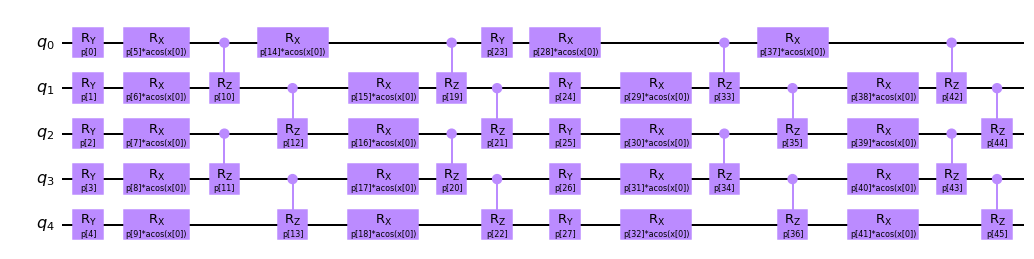

In [2]:
lfm = LayeredEncodingCircuit.from_string(
    "Ry(p)-2[Rx(p,x;=p*np.arccos(x),{p,x})-crz(p)]",
    num_qubits=5,  # Number of qubits
    num_features=1,  # Dimension of the input data
    num_layers=2,  # Number of repetitions
)
lfm.draw("mpl")

### Build an encoding circuit from Qiskit gates

The following paragraph shows, how to construct an encoding circuit from commands associated with the Qiskit gates.
Single qubit operators are applied to all qubits; two-qubit gates are applied either in a all-to-all or a nearest neighbor arrangement.
Encoding maps can be specified by a custom python function.

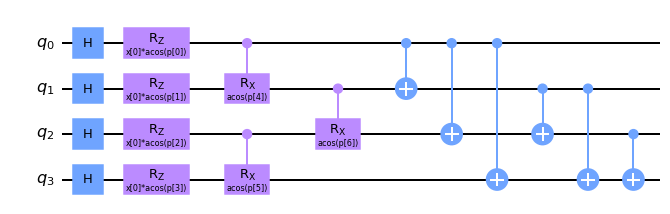

In [3]:
# Empty LayeredEncodingCircuit with 4 qubits and a one-dimensional input
lfm2 = LayeredEncodingCircuit(num_qubits=4, num_features=1)


# Function for encoding the data in the rotational gates
def multiply_with_arccos(x, y):
    return x * np.arccos(y)


# Create the encoding circuit via gate operations
lfm2.H()
lfm2.Rz("x", "p", encoding=multiply_with_arccos)
lfm2.crx_entangling("p", encoding=np.arccos)
lfm2.cx_entangling(ent_strategy="AA")

# Draw final output
lfm2.draw("mpl")

### Create Layer that are repeated

The following example shows, how to create a Layer that can be repeated multiple times.

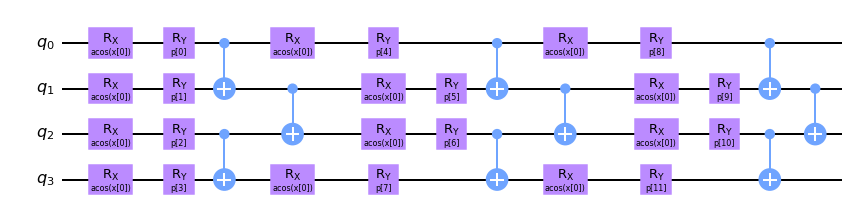

In [4]:
# Empty LayeredEncodingCircuit with 4 qubits and a one-dimensional input
lfm3 = LayeredEncodingCircuit(num_qubits=4, num_features=1)

# Creates the layer associated with feature map lfm2
layer = Layer(lfm3)

# Add gates to the layer
layer.Rx("x", encoding=np.arccos)
layer.Ry("p")
layer.cx_entangling()

# Add the layer to the feature map lfm3
lfm3.add_layer(layer, num_layers=3)
lfm3.draw("mpl")